<center> <h1>Cálculo e Análise Numérico.    &nbsp;&nbsp;&nbsp;&nbsp;     Grao en Intelixencia Artificial (Uvigo) 
    <br />
    Práctica 1 &nbsp;&nbsp;&nbsp;&nbsp;  (14, 15 e 17 de outubro de 2024)<center> <h1>

# Introdución

Nesta práctica, por unha banda, imos utilizar os métodos de dicotomía e Newton-Raphson para resolver ecuacións non lineais e por outra banda construír o polinomio de Lagrange para aproximar funcións ou datos.

Comezamos cargando os módulos Python que comentamos na Práctica 0.

In [2]:
import sympy as sp
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# Método de dicotomía

Consideramos unha función $f: [a,b]\subset\mathbb{R}  \to \mathbb{R}$, continua en $[a,b]$ tal que $f(a)\cdot f(b)<0$ (condicións do teorema de Bolzano). Para aproximar unha raíz de $f$ en $[a,b]$ usando método de dicotomía (ou bisección) debemos seguir os seguintes pasos:
* Dividir o intervalo dado á metade.
* Tomar o punto medio do intervalo como aproximación da raíz.
* Repitir o proceso coa metade do intervalo na que $f$ presenta un cambio de signo (verifica Bolzano).

## Algoritmo

* Inicializar $\, [a_1,b_1]=[a,b]$.
* Para $\,k=1,2,\ldots, N_{\text{max}}$:
  * Calcular $\,x_k=\displaystyle\frac{a_k+b_k}{2}$.
  * Se $\, f(a_k)\,f(x_k)<0$, actualizar $[a_{k+1},b_{k+1}]=[a_k,x_k]$.
  * Se non, $[a_{k+1},b_{k+1}]=[x_k,b_k]$.
  * Test de parada. Se se cumple, detemos o algoritmo.
* Continuamos iterando.

## Programación do método
Definimos unha función chamada `dicotomia` con entradas:
* a: extremo esquedo do intervalo.
* b: extremo dereito do intervalo.
* f: función.
* n: número máximo de iteracións, fixado por defecto en 100.
* tol: tolerancia, fixada por defecto en $10^{-6}$.

As saídas da función son o número de iteracións efectuado e a aproximación da raíz.

In [2]:
def dicotomia(a,b,f,n=100,tol=1e-6): 
    x_aprox = np.zeros(n)
    for k in range(0,n):
        x_aprox[k] = (a+b)/2
        if f(x_aprox[k]) == 0: 
            break
        if f(a) * f(x_aprox[k]) < 0:
            b = x_aprox[k]
        else:
            a = x_aprox[k]
        if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ):
            break
    return k+1, x_aprox[k] 

# Exemplo
x = sp.symbols('x', real=True) # Definimos a variable simbólica x
f_expr = sp.cos(x)             
f = sp.Lambda(x,f_expr)        # Definimos a función

N_max = 100
tol = 1.e-6
a = 0.
b = 2.

display(dicotomia(a,b,f,N_max))

iteracions, raiz_aprox = dicotomia(a,b,f,N_max) # Obtemos as iteracións e a raíz aproximada

print('Número de iteracións: ', iteracions) 
print('Aproximación da raíz: ', raiz_aprox)


(21, 1.570796012878418)

Número de iteracións:  21
Aproximación da raíz:  1.570796012878418


### Exercicio: 
* Comenta o que realiza cada liña do código da función `dicotomia`. 
* Escribe unha nova función, `dicotomia_new`, tal que se use como test de parada a cota do erro $\displaystyle \frac{b-a}{2^k}$, en vez de $\displaystyle \frac{x_k-x_{k-1}}{x_k}$.
* Obtén a raíz da función usando `sp.solve`.
* Comproba o erro que se cometeu.

## Exemplo completo
Neste apartado imos comprobar que $f(x)=e^x -\frac{3}{2}$ ten unha única solución no intervalo $[0, 1]$ e aproximarémola usando o método de dicotomía.


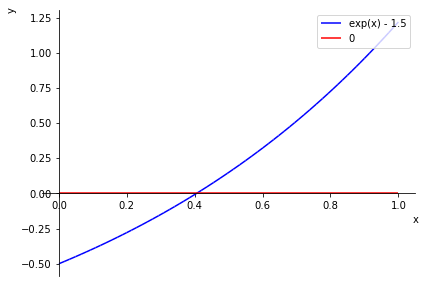

In [4]:
# Definimos a función
x = sp.symbols('x', real=True) 
f_expr = sp.exp(x) -3/2             
f = sp.Lambda(x,f_expr)  

# Podemos debuxar a súa gráfica para ver gráficamente se f ten unha raíz
p = sp.plot(f_expr, 0, (x, 0, 1), show=False)
p[0].line_color='b'
p[1].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

Sabemos que $f$ é continua en todo $\mathbb{R}$ temos que ver se $f(0)f(1)<0$ para estar nas condicións do teorema de Bolzano e ter garantida a existencia de polo menos unha raíz en $(0,1)$.

In [4]:
print('f(0)=',f(0))
print('f(1)=',f(1))
display(f(0)*f(1)<0) # Comprobamos condición

f(0)= -0.500000000000000
f(1)= -1.5 + E


True

Demostramos a unicidade usando o teorema de Rolle, para o que debemos comprobar se $f'(x)\neq 0, \ \forall x \in (0,1)$.

Imos usar as funcións se Sympy: 
- `sp.diff` para calcular derivadas.
- `sp.Interval` para definir un intervalo.
- `sp.solveset` obter as raíces dunha función nun intervalo dado.

EmptySet

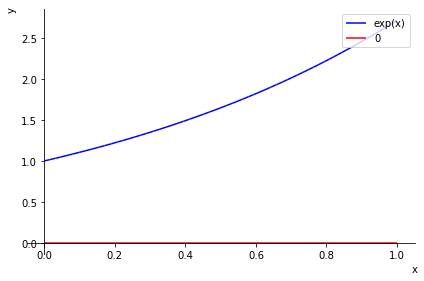

In [5]:
f_der_expr = sp.diff(f_expr,x) # Derivamos f

# Comprobamos se f_der ten algunha raíz no intervalo dado.
solucion = sp.solveset(f_der_expr,x,domain=sp.Interval(0,1))

display(solucion)

# Tamén podemos debuxar a súa gráfica d f' para ver se ten algunha raíz
p = sp.plot(f_der_expr, 0, (x, 0, 1), show=False)
p[0].line_color='b'
p[1].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

Como $f'$ non ten raíces en $(0,1)$, acabamos de probar que $f$ ten unha única solución en $(0,1)$. Usamos agora o método de dicotomía para aproximar a raíz de $f$. 

In [6]:
iteracions, raiz_aprox = dicotomia(0,1,f) # Obtemos as iteracións e a raíz aproximada

print('Número de iteracións: ', iteracions) 
print('Aproximación da raíz: ', raiz_aprox)

Número de iteracións:  22
Aproximación da raíz:  0.40546488761901855


In [7]:
# Tamén podemos calcular o erro cometido
raiz=sp.solveset(f_expr,x,domain=sp.Interval(0,1)) # Obtemos o valor da raíz de f en (0,1)
display(raiz, type(raiz))
display(raiz.args[0], type(raiz.args[0])) # Obtemos o valor (float) da raíz para poder operar con el
erro = sp.Abs(raiz.args[0]-raiz_aprox)
print('Erro da aproximación: ', erro)

FiniteSet(0.405465108108164)

sympy.sets.sets.FiniteSet

0.405465108108164

sympy.core.numbers.Float

Erro da aproximación:  2.20489145830172e-7


In [8]:
# Podemos mellorar o erro se diminuímos a tolerancia (e no seu caso, aumentamos o número de iteracións)
iteracions, raiz_aprox = dicotomia(0,1,f,tol=1e-10) # Obtemos as iteracións e a raíz aproximada

erro = sp.Abs(raiz.args[0]-raiz_aprox)
print('Número de iteracións: ', iteracions) 
print('Aproximación da raíz: ', raiz_aprox)
print('Erro da aproximación: ', erro)

Número de iteracións:  35
Aproximación da raíz:  0.40546510808053426
Erro da aproximación:  2.76301204138463e-11


### Exercicio
Representa graficamente a función $f(x)=\sin(2x-\frac{\pi}{4})$ e comproba ten unha única raiz en $(0,1)$. Usa o método de dicotomía para aproximala cun erro menor a $10^{-12}$.

# Método de Newton-Raphson
* Iniciar $x_0$, aproximación da raíz $\alpha$ tal que $f(\alpha)=0$.
* Construímos $x_1$ calculando a intersección da recta tanxente á gráfica de $f$ en $(x_0, f(x_0))$ co eixo de abscisas.
* Repetimos o proceso ata que $x_k$ aproxima satisfactoriamente unha raíz $\alpha$ da función $f$. Con $x_{x+1} = x_k -\dfrac{f(x_k)}{f'(x_k)} \quad \text{se } f'(x_k)\neq 0$.
* Podemos usar como test de parada o erro relativo entre dúas aproximacións sucesivas: $\dfrac{|x_{k+1}-x_{k}|}{|x_{k+1}|}.$

## Programación do método
Definimos unha función chamada `NewtonRaphson` con entradas:
* x0: aproximación inicial.
* f: función.
* df: derivada da función.
* n: número máximo de iteracións, fixado por defecto en 100.
* tol: tolerancia, fixada por defecto en $10^{-6}$.

As saídas da función é o número de iteracións efectuado e a aproximación da raíz.


In [13]:
def NewtonRaphson(x0,f,df,n=100,tol=1e-6):
    x_aprox = np.zeros(n)
    x_aprox[0] = x0
    for k in range(1,n):
        if df(x_aprox[k-1]) == 0: 
            break
        x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/df(x_aprox[k-1])
        if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): 
            break
    return  k, x_aprox[k] 
    

# Usamos un exemplo para probar o funcionamento do método programado anteriormente.    
x = sp.symbols('x', real=True) # define la variable simbólica x
f_expr = x**3+2*x-2
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x,f_der_expr)

x0 = 2
N_max = 10
tol = 1.e-9

iteracionsNR, raiz_aproxNR = NewtonRaphson(x0,f,f_der,N_max,tol) # Obtemos as iteracións e a raíz aproximada

print('Número de iteracións: ', iteracionsNR) 
print('Aproximación da raíz: ', raiz_aproxNR)

Número de iteracións:  7
Aproximación da raíz:  0.7709169970592481


## Condicións converxencia
Sexa $f:[a,b]\subset\mathbb{R}  \to \mathbb{R}$ unha función de clase dous que verifica:

- $f(a)f(b)<0$.
- $f'(x)\neq 0, \ \forall x \in [a,b]$.
- $f''(x)\leq 0  \text{ ou } f''(x)\geq 0, \ \forall x \in [a,b]$.

Entón $f(x)=0$ ten solución única $\alpha \in (a,b)$. Ademais se $x_0 \in [a,b]$ verifica que $f(x_0)f''(x_0)>0$ entón o método de Newton-Raphson converxe a $\alpha$.

## Exemplo completo
Imos resolver o mesmo exemplo que con dicotomía para comparar os métodos.
Atopar un punto co que incializar o método de Newton-Raphson para aproximar a única raíz de $f(x)=e^x -\frac{3}{2}$ no intervalo $[0, 1]$ e aproximarémola usando o método de Newton-Raphson.

Xa vimos en apartados anteriores que: 
- $f(0)f(1)<0$
- $f'(x)\neq 0, \ \forall x \in [0,1]$

Vexamos a terceira condición do teorema de converxencia, $f''(x)\leq 0  \text{ ou } f''(x)\geq 0, \ \forall x \in [0,1]$.

Puntos do intervalo onde ddf(x)=0:


EmptySet

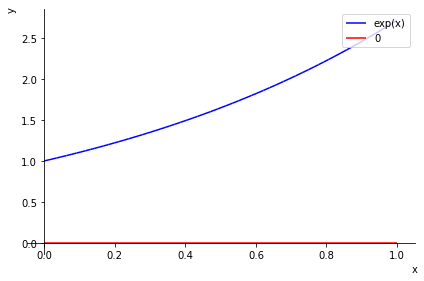

ddf(1)=  E
f(1)ddf(1)=  3.3116333562420825


In [9]:
x = sp.symbols('x', real=True) 
# Obtemos f
f_expr = sp.exp(x) -3/2             
f = sp.Lambda(x,f_expr)
# Obtemos f'
f_der_expr = sp.diff(f_expr,x)
f_der = sp.Lambda(x,f_der_expr)
# Obtemos f''
f_der2_expr = sp.diff(f_der_expr,x) # Obtemos f''

# Comprobamos se f'' ten algunha raíz no intervalo dado.
solucion = sp.solveset(f_der2_expr,x,domain=sp.Interval(0,1))

print('Puntos do intervalo onde ddf(x)=0:')
display(solucion)

# Tamén podemos debuxar a súa gráfica d f' para ver se ten algunha raíz
p = sp.plot(f_der2_expr, 0, (x, 0, 1), show=False)
p[0].line_color='b'
p[1].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

print('ddf(1)= ', f_der2_expr.subs(x,1))

print('f(1)ddf(1)= ',float(f(1)*f_der2_expr.subs(x,1)))

Acabamos de comprobar que $f''(x)\geq 0, \ \forall x \in [0,1]$ e ademais $f(1)f''(1)>0$ polo que podemos coller $x_0=1$ e temos a converxencia garantida.

In [15]:
x0 = 1
N_max = 100 
tol = 1.e-6
iteracionsNR, raiz_aproxNR = NewtonRaphson(x0,f,f_der,N_max,tol) # Obtemos as iteracións e a raíz aproximada

print('Número de iteracións: ', iteracionsNR) 
print('Aproximación da raíz: ', raiz_aproxNR)

Número de iteracións:  4
Aproximación da raíz:  0.7709169970592638


### Exercicio
Usa o método de Newton-Raphson para aproximar a solución de $f(x)=\sin(2x-\frac{\pi}{4})$ (a mesma función que a do exercicio de dicotomía). Escolle unha aproximación inicial da raíz que verifique as condicións do teorema dado para ter garantida a converxencia do método. Comproba que método é máis rápido (acada a mesma precisión con menos iteracións) para obter unha solución cun erro menor que $10^{-9}$.

# Polinomio de interpolación de Lagrange
Nesta práctica non imos ver como se programan os distintos métodos (polinomios fundamentais de Lagrange e diferencias divididas) vistos durante o curso para obter o polinomio de Lagrange. Imos usar directamente a función xa implementada en Python `lagrange` do módulo **scipy.interpolate**.

De tódolos xeitos se estades interesados en ver a súa programación podedes visitar https://gei-cal.github.io/JB-Calculo1-UDC/capitulos/02/07.Lagrange.html

Coeficientes do polinomio de Lagrange ordenados de maior a menor grao:


poly1d([ 2., -4., -3.,  1.])

Polinomio de Lagrange:


Polynomial([ 1., -3., -4.,  2.], domain=[-1,  1], window=[-1,  1])

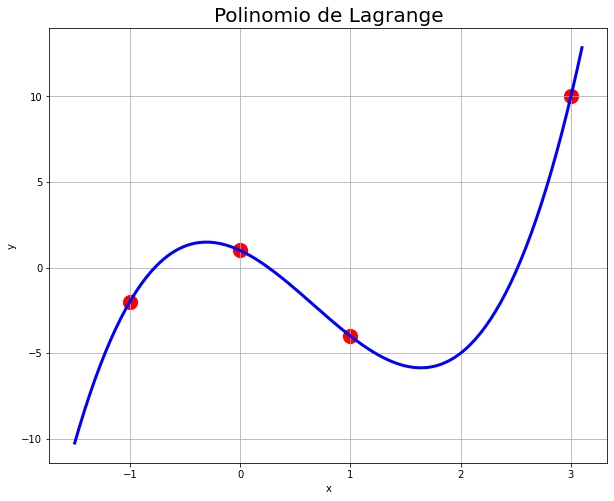

In [12]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

x_coef = [-1, 0, 1, 3]
y_coef = [-2, 1, -4, 10]
x= np.linspace(-1.5, 3.1, 200)

P_L = lagrange(x_coef, y_coef) # Obtemos o polinomio de lagrange
print('Coeficientes do polinomio de Lagrange ordenados de maior a menor grao:')
display(P_L) # Coeficientes do polinomio de Lagrange ordenados de maior a menor grao
print('Polinomio de Lagrange:')
display(Polynomial(P_L.coef[::-1])) # Polinomio de Lagrange

fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, P_L(x), 'b', lw='3')
plt.title('Polinomio de Lagrange', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exemplo
Imos construír o polinomio de Lagrange e representalo para os valores dados na seguinte táboa:
    
| $x_{i}$ | -1 | 0 | 1 | 3 | 4 |
| --      | -- | --| --| --| --|
| $f(x_{i})$ | 6 | 3| 6 | 38 | 77|

Polinomio de Lagrange:


Polynomial([ 3.        , -0.03333333,  2.9       ,  0.03333333,  0.1       ], domain=[-1,  1], window=[-1,  1])

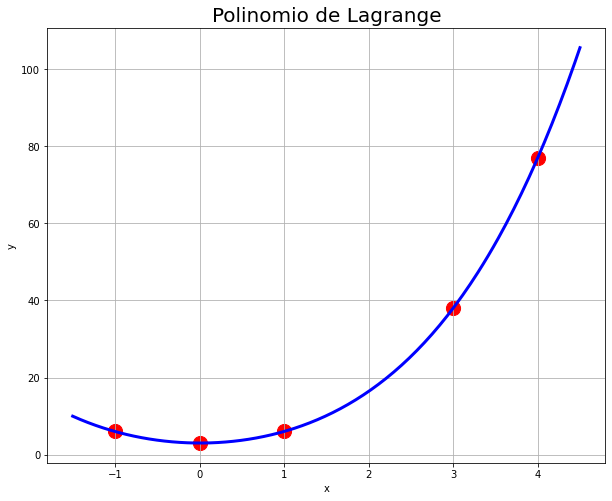

In [13]:
x_coef = [-1,0,1,3,4]
y_coef = [6,3,6,38,77]
x= np.linspace(-1.5, 4.5, 200)

P_L = lagrange(x_coef, y_coef) # Obtemos o polinomio de lagrange
print('Polinomio de Lagrange:')
display(Polynomial(P_L.coef[::-1])) # Polinomio de Lagrange

fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, P_L(x), 'b', lw='3')
plt.title('Polinomio de Lagrange', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exemplo 2
Vexamos un exemplo onde temos unha gran cantidade de puntos.

Polinomio de Lagrange:


Polynomial([ 2.15941152e+04, -1.51144477e+05,  4.55493869e+05, -7.91620451e+05,
        8.92388134e+05, -6.93430088e+05,  3.84272923e+05, -1.54651672e+05,
        4.55078175e+04, -9.75910425e+03,  1.50353698e+03, -1.61600392e+02,
        1.14705582e+01, -4.81998173e-01,  9.05965323e-03], domain=[-1,  1], window=[-1,  1])

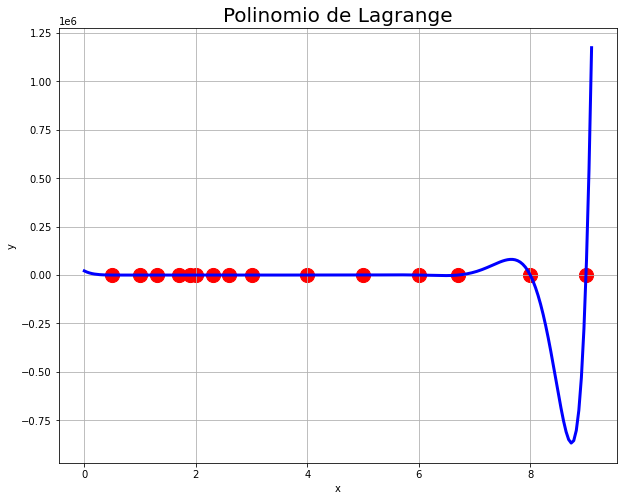

In [14]:
x_coef = [0.5, 1, 1.3, 1.7, 1.9,   2, 2.3, 2.6,   3, 4,   5, 6, 6.7,   8, 9]
y_coef = [3.5,   4, 4.1, 4.8, 5.2, 4.9, 4.5, 4.4, 3.7, 4, 4.1, 4, 3.9, 4, 4.9]
x= np.linspace(0, 9.1, 200)

P_L = lagrange(x_coef, y_coef) # Obtemos o polinomio de lagrange
print('Polinomio de Lagrange:')
display(Polynomial(P_L.coef[::-1])) # Polinomio de Lagrange

fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, P_L(x), 'b', lw='3')
plt.title('Polinomio de Lagrange', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Exercicio
Cal é o principal problema que lle atopas ao polinomio de Lagrange construído? Modifica os límites do eixo $y$ para apreciar mellor o que sucede na escala dos valores dados.


## Interpolación spline cúbica
Unha interpolación máis precisa que a do polinomio de Lagrange e a spline cúbica. Para iso usaremos a función `CubicSpline` do módulo **scipy.interpolate**. Con este método evitaremos as oscilacións do último exemplo.

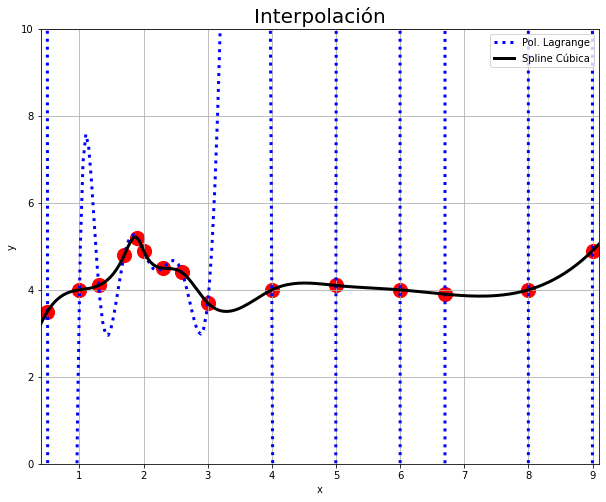

In [15]:
from scipy.interpolate import CubicSpline

x_coef = [0.5, 1, 1.3, 1.7, 1.9,   2, 2.3, 2.6,   3, 4,   5, 6, 6.7,   8, 9]
y_coef = [3.5,   4, 4.1, 4.8, 5.2, 4.9, 4.5, 4.4, 3.7, 4, 4.1, 4, 3.9, 4, 4.9]
x= np.linspace(0.4, 9.1, 200)

P_CS = CubicSpline(x_coef, y_coef) # Obtemos a interpolación con spline cúbica

fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, P_L(x), 'b:', lw='3',label='Pol. Lagrange')
plt.plot(x, P_CS(x), 'k', lw='3',label='Spline Cúbica')
plt.title('Interpolación', fontsize=20)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,10])
plt.xlim([0.4,9.1])
plt.show()

### Exercicio
Constrúe o polinomio de Lagrange e spline cúbico para os datos que se dan na táboa. Os $x_i$ representan os días do mes de setembro de 2023 e $f(x_i)$ representan as temperaturas máximas dese día en Ourense, obtidas en https://es.weatherspark.com/d/32926/9/7/Tiempo-promedio-el-7-de-septiembre-en-Orense-Espa%C3%B1a#Figures-Temperature. Ademais:

* Representa as dúas interpolacións xunto cos datos dados e comenta cal é mellor. 
* Usa o polinomio de Lagrange para obter a temperatura para o 20 de setembro. Que sucede co valor obtido?


    
| $x_{i}$    | 3  | 5 | 8 | 9 | 10 |12|14|16|17|
| --         | -- | --| --| --| -- |--|--|--|--|
| $f(x_{i})$ | 25 | 23| 26| 21| 24 |24|29|22|18|